In [581]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

In [582]:
torch.__version__

'2.5.1'

In [583]:
# linear regression


In [584]:
weight = 0.7
bias = 0.3
start = 0
end = 1

In [585]:
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * x + bias 
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [586]:
train_split = int(0.8*len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

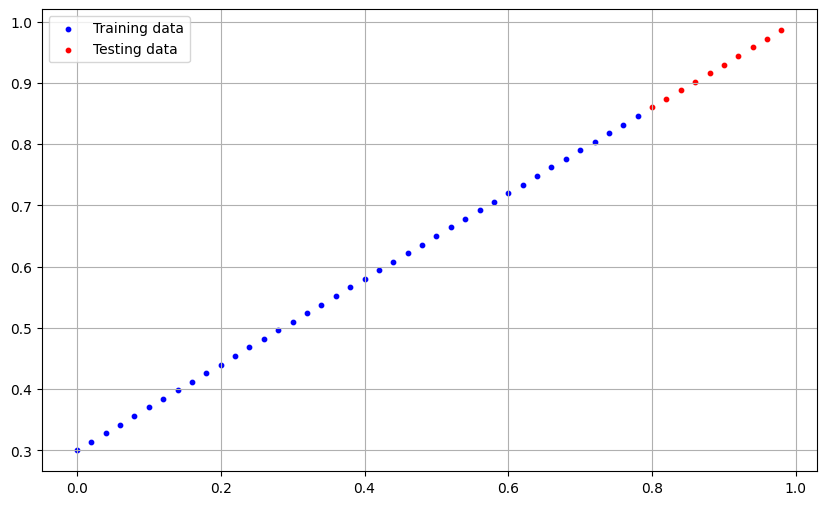

In [587]:
def plot_pred(train_data = x_train, train_labels=y_train, test_data = x_test, test_labels=y_test, predictions=None):

    plt.figure(figsize=(10, 6))
    plt.scatter(train_data, train_labels, c='b', s=10, label='Training data')
    plt.scatter(test_data, test_labels, c='r', s=10, label='Testing data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='black', s=10, label='Predictions')
    plt.legend()   
    plt.grid(True)
    
plot_pred()

In [588]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [589]:
torch.manual_seed(42)

model_0 = LinearRegression()
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [590]:
with torch.inference_mode():
    y_preds = model_0(x_test)
    
y_preds
    

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [591]:
y_test[:10]

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

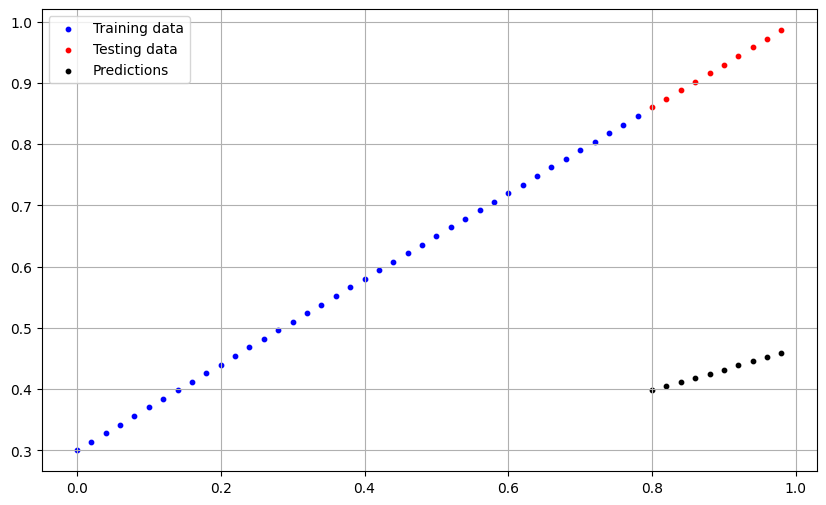

In [592]:
plot_pred(predictions=y_preds)

In [593]:
#Loss function

In [594]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [598]:
#Training Loop
epochs = 200


epoch_count=[]
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
    y_preds = model_0(x_train)
    
    loss = loss_fn(y_preds, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        test_preds = model_0(x_test)
        
        test_loss = loss_fn(test_preds, y_test)
    if epoch %10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss.numpy)
        test_loss_values.append(test_loss)
    
        print(f"Epoch: {epoch}, Loss: {loss:.4f}, Test Loss: {test_loss:.4f}")
            
print(model_0.state_dict())

Epoch: 0, Loss: 0.0398, Test Loss: 0.1193
Epoch: 10, Loss: 0.0398, Test Loss: 0.1193
Epoch: 20, Loss: 0.0398, Test Loss: 0.1193
Epoch: 30, Loss: 0.0398, Test Loss: 0.1193
Epoch: 40, Loss: 0.0398, Test Loss: 0.1193
Epoch: 50, Loss: 0.0398, Test Loss: 0.1193
Epoch: 60, Loss: 0.0398, Test Loss: 0.1193
Epoch: 70, Loss: 0.0398, Test Loss: 0.1193
Epoch: 80, Loss: 0.0398, Test Loss: 0.1193
Epoch: 90, Loss: 0.0398, Test Loss: 0.1193
Epoch: 100, Loss: 0.0398, Test Loss: 0.1193
Epoch: 110, Loss: 0.0398, Test Loss: 0.1193
Epoch: 120, Loss: 0.0398, Test Loss: 0.1193
Epoch: 130, Loss: 0.0398, Test Loss: 0.1193
Epoch: 140, Loss: 0.0398, Test Loss: 0.1193
Epoch: 150, Loss: 0.0398, Test Loss: 0.1193
Epoch: 160, Loss: 0.0398, Test Loss: 0.1193
Epoch: 170, Loss: 0.0398, Test Loss: 0.1193
Epoch: 180, Loss: 0.0398, Test Loss: 0.1193
Epoch: 190, Loss: 0.0398, Test Loss: 0.1193
OrderedDict({'weights': tensor([0.6512]), 'bias': tensor([0.3588])})


In [599]:
with torch.inference_mode():
    y_preds_new = model_0(x_test)

In [601]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label='train loss')
plt.plot(epoch_count, test_loss_values, label='test loss')
plt.title('Loss vs. epochs')
plt.ylabel("loss")
plt.xlabel('epochs')
plt.legend()

RuntimeError: Could not infer dtype of builtin_function_or_method

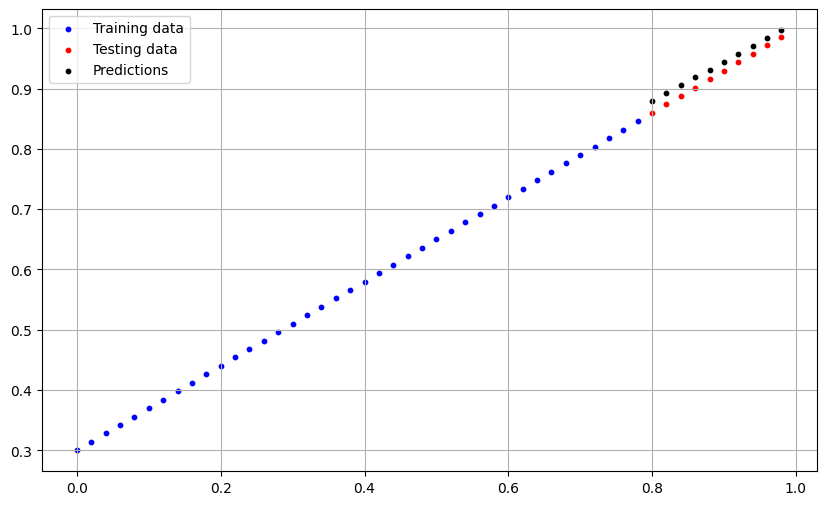

In [ ]:
plot_pred(predictions=y_preds_new)